One of the more popular Convolutional Network architectures is called VGG-16, named such because it was created by the Visual Geometry Group and contains 16 hidden layers (more on this below).

Essentially, it's architecture can be described as:

- Multiple convolutional layers
- A max pooling layer
- Rinse, repeat for awhile
- A couple Fully Connected Layers
- SoftMax for multiclass predection

And that's it. The key advantage of VGG is its simplicty.

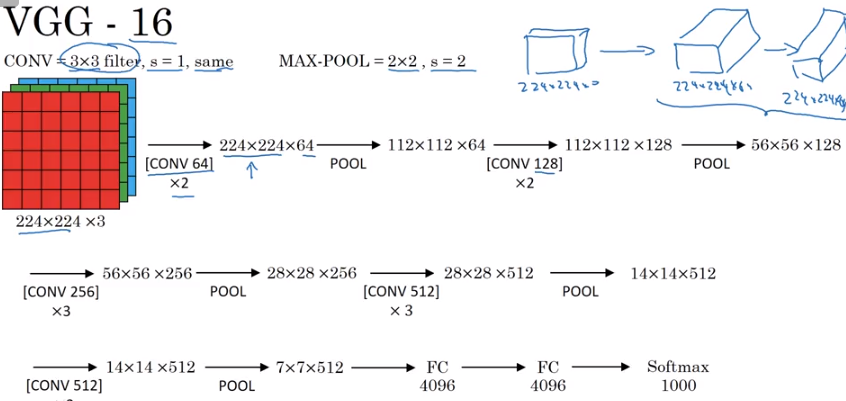

In [1]:
from IPython.display import Image

Image('images/vgg.png')

Few things to point out here:

- The width and height of each layer gradually down
- Conversely, the number of channels go up the deeper into the network you go-- this is how we abstract complicated features
- Traditionally, we don't consider Pooling layers as "layers," as they don't have any trainable parameters. Thus, 13 Conv layers, 2 FC layers, and 1 Softmax layers sum to 16, its namesake
    - You could also employ VGG19, but the tradeoff between computation and performance increase is sort of moot

### Using It

The model was trained on the [ImageNet dataset](http://image-net.org/), and is readily available in `keras` under the `applications.vgg16` namespace.

In [2]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


`keras` will download it locally if you don't already have it hwen you instantiate the class.

In [3]:
model = VGG16()

Note: This is a pretty hefty model, so be prepared to wait if you haven't downloaded it already.

In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Generally speaking, once you've got these weights, you want to mentally divide everything before and after the `flatten` layer into "feature extraction" and "classification".

Depending on your use case, you might want to only retrain the classification section. Or you might want to derive some new features by un-freezing the last convolutional block or two. This is where the art aspect comes in.

Regardless, though, you'll want to reinitialize the classifier layer before training, as it's engineered for ImageNet.

See [the keras documentation](https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes) for the nitty-gritty.